# Create Data

This is the completed solution for the [Create Data Tutorial](https://developers.arcgis.com/labs/data/python/create-data/). 

[ArcGIS tutorials](https://developers.arcgis.com/labs/) are short guides demonstrating the three phases of building geospatial apps: Data, Design, Develop.

In [4]:
import getpass
from arcgis.gis import *

Please enter password: ········


To create the GIS object, we pass your profile that contains the url and your login credentials. Please replace the credentials below with that of your org. To learn more about profiles, see [here](https://developers.arcgis.com/python/guide/working-with-different-authentication-schemes/#Storing-your-credentialls-locally).

In [ ]:
dev_gis = GIS(profile='your_online_profile')

In [3]:
feature_layer_srch_results = dev_gis.content.search(query='"Trailheads"', max_items=10)
feature_layer_srch_results[0]

[<Item title:"Trailheads" type:Feature Layer Collection owner:yjiang_geosaurus>]

In [11]:
trailheads_layer.properties.name

'Trailheads'

In [12]:
for field in trailheads_layer.properties['fields']:
    print('Name: {:16s}\tType: {}'.format(field['name'], field['actualType']))

OBJECTID
TRL_NAME
PARK_NAME
TRL_ID
SEG_ID
FEATURE
FEAT_CMNT
ELEV_FT
CITY_JUR
ZIP_CODE
SUP_DIST
X_STREET
PARKING
PHOTO
LAT
LON
FID
x
y
ObjectId2


In [13]:
from arcgis import geometry
from arcgis import features


def create_feature(map, location):
    try:
        '''
        `location` will be a dict the following format:
        
        ```json
        {
            'spatialReference': 
            {
                'latestWkid': 3857, 
                'wkid': 102100
            }, 
            'x': -13228260.775215352, 
            'y': 4044978.1647766223
        }
        ```
        '''
        
        object_id = 1
        point = geometry.Point(location)
        
        feature = features.Feature(
            geometry=point, 
            attributes={
                'OBJECTID': object_id,
                'PARK_NAME': 'My Park',
                'TRL_NAME': 'Foobar Trail',
                'ELEV_FT': '5000'
            }
        )
        
        trailheads_layer.edit_features(adds=[feature])
        map.draw(point)
        
    except Exception as e:
        print("Couldn't create the feature. {}".format(str(e)))

In [27]:
### Map of LA


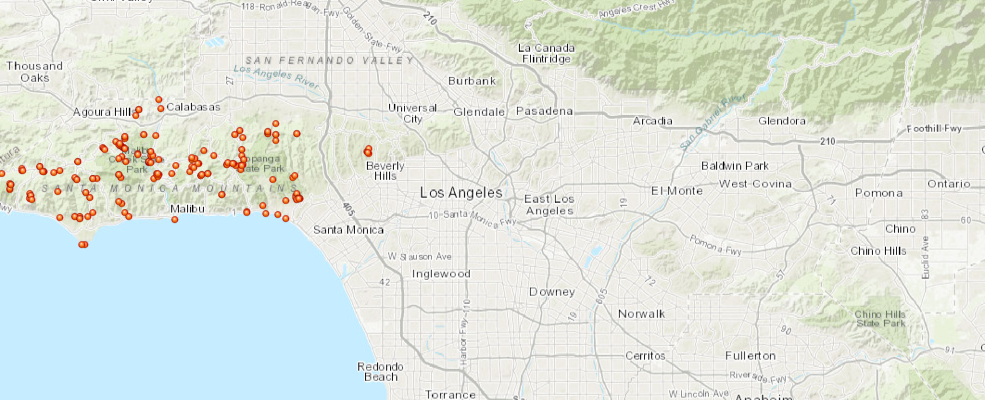

In [20]:
map

In [15]:
map.basemap = 'topo-vector'
map.center = coords
map.zoom = 11

In [16]:
map.clear_graphics()

In [17]:
map.add_layer(trailheads_layer)